In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
final = pd.read_csv('./dataset/ipl/prediction_df.csv')
final = final.iloc[:, 1:]
final.head()

,id,inning,batting_team,toss_winner,toss_decision,city,winner,last_over,wickets,cum_score_6,fall_wickets_6,final_20,batting_avg,run_rate_6
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,field,Hyderabad,Sunrisers Hyderabad,17,0,59,1,207,159.492754,8.350242
1,2,2,Chennai Super Kings,Chennai Super Kings,field,Pune,Chennai Super Kings,16,0,59,1,187,164.539130,7.742029
2,3,2,Kolkata Knight Riders,Kolkata Knight Riders,field,Rajkot,Kolkata Knight Riders,20,0,73,0,184,159.032967,8.250916
3,4,2,Kings XI Punjab,Kings XI Punjab,field,Indore,Kings XI Punjab,8,1,56,2,164,165.182927,8.398374
4,5,1,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Bengaluru,Royal Challengers Bangalore,9,1,41,2,157,165.119048,8.035714


In [3]:
X = final.drop(columns=['id','toss_winner','winner','last_over','city','toss_decision','final_20','wickets','batting_team'])
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,inning,cum_score_6,fall_wickets_6,batting_avg,run_rate_6
0,1,59,1,159.492754,8.350242
1,2,59,1,164.539130,7.742029
2,2,73,0,159.032967,8.250916
3,2,56,2,165.182927,8.398374
4,1,41,2,165.119048,8.035714


In [13]:
def mae(y, pred):
    return np.absolute(pred - y).sum()/len(y)

In [14]:
Y = final['final_20']
Y.head()

0    207
1    187
2    184
3    164
4    157
Name: final_20, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (599, 5)
X_test shape:  (150, 5)
y_train shape:  (599,)
y_test shape:  (150,)


In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter.transpose()

,inning,cum_score_6,fall_wickets_6,batting_avg,run_rate_6
Coefficient,-23.381372,0.843606,-1.918778,1.02186,0.572645


In [18]:
predictions = model.predict(X_test)
predictions[:5]

array([160.17421132, 165.96685097, 183.36568918, 148.14517912,
       179.19667792])

C:\Users\naman\anaconda3\envs\dap\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='final_20'>

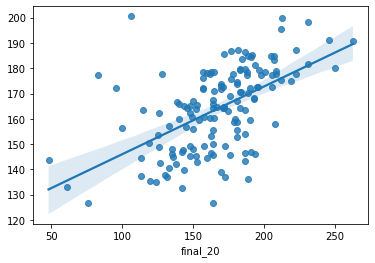

In [9]:
sns.regplot(y_test,predictions)

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test.values, predictions)
r2 = r2_score(y_test.values, predictions)
print("MSE: ", mse)
print("R2 Score: ", r2)
print("MAE: ", mae(y_test, predictions))

MSE:  815.8172967555176
R2 Score:  0.2973148822762133
MAE:  21.143367194658033


C:\Users\naman\anaconda3\envs\dap\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


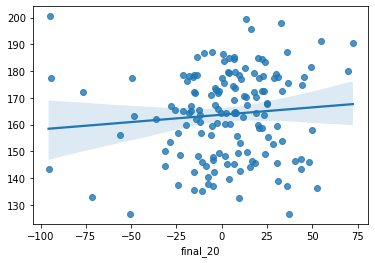

In [21]:
residuals = y_test-predictions
sns.regplot(residuals, predictions)
plt.show()

## Ridge Regression

In [22]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.8)
model.fit(X_train, y_train)

Ridge(alpha=1.8)

In [23]:
predictions = model.predict(X_test)
predictions[:5]

array([160.03376247, 165.80466359, 183.18005486, 148.26385095,
       179.02753672])

In [24]:
mse = mean_squared_error(y_test.values, predictions)
r2 = r2_score(y_test.values, predictions)
print("MSE: ", mse)
print("R2 Score: ", r2)
print("MAE: ", mae(y_test, predictions))

MSE:  816.9797117565159
R2 Score:  0.29631366334512554
MAE:  21.15910501440469


C:\Users\naman\anaconda3\envs\dap\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='final_20'>

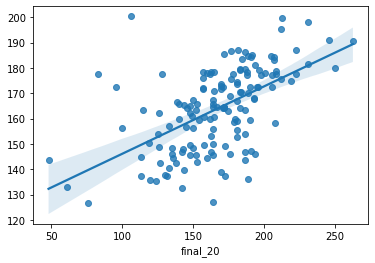

In [25]:
sns.regplot(y_test,predictions)

C:\Users\naman\anaconda3\envs\dap\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


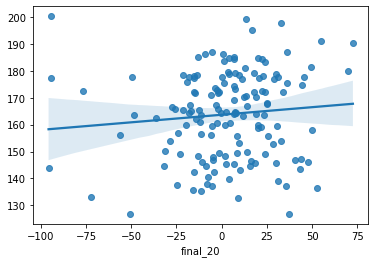

In [26]:
residuals = y_test-predictions
sns.regplot(residuals, predictions)
plt.show()

## Decision Tree Regressor

In [27]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [29]:
predictions = model.predict(X_test)

C:\Users\naman\anaconda3\envs\dap\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='final_20'>

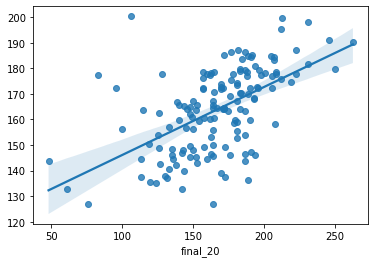

In [30]:
sns.regplot(y_test,predictions)

In [31]:
mse = mean_squared_error(y_test.values, predictions)
r2 = r2_score(y_test.values, predictions)
print("MSE: ", mse)
print("R2 Score: ", r2)
print("MAE: ", mae(y_test, predictions))

MSE:  816.9797117565159
R2 Score:  0.29631366334512554
MAE:  21.15910501440469


## KNN Regressor

In [32]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsRegressor()

In [33]:
predictions = model.predict(X_test)
predictions[:5]

array([134.8, 160. , 189.6, 170.6, 171.4])

C:\Users\naman\anaconda3\envs\dap\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='final_20'>

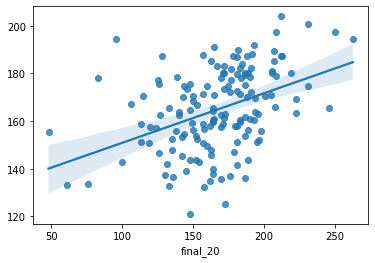

In [34]:
sns.regplot(y_test,predictions)

In [35]:
mse = mean_squared_error(y_test.values, predictions)
r2 = r2_score(y_test.values, predictions)
print("MSE: ", mse)
print("R2 Score: ", r2)
print("MAE: ", mae(y_test, predictions))

MSE:  978.4042666666666
R2 Score:  0.1572744044060721
MAE:  23.584


In [36]:
k = []
rmse = []
r2s = []
for i in range(3, 20):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    r2 = r2_score(y_test.values, predictions)
    mse = mean_squared_error(y_test.values, predictions)
    _rmse = np.sqrt(mse)
    k.append(i)
    rmse.append(_rmse)
    r2s.append(r2)

C:\Users\naman\anaconda3\envs\dap\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

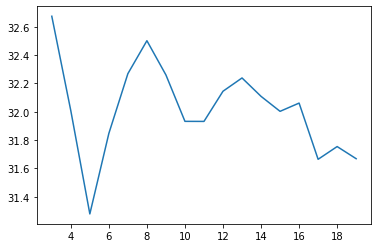

In [37]:
sns.lineplot(k, rmse)

In [38]:
model.score(X_test, y_test)

0.13615179839109803

## Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor
lin = RandomForestRegressor(n_estimators=20,max_features=None)
lin.fit(X_train,y_train)

RandomForestRegressor(max_features=None, n_estimators=20)

C:\Users\naman\anaconda3\envs\dap\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='final_20'>

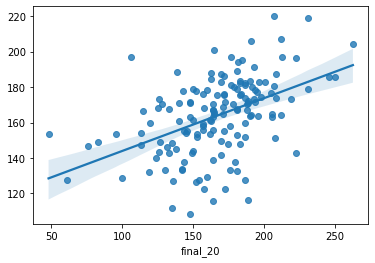

In [40]:
predictions = lin.predict(X_test)
sns.regplot(y_test,predictions)

In [41]:
mse = mean_squared_error(y_test.values, predictions)
r2 = r2_score(y_test.values, predictions)
print("MSE: ", mse)
print("R2 Score: ", r2)
print("MAE: ", mae(y_test, predictions))

MSE:  951.9046424797808
R2 Score:  0.1800992349354722
MAE:  23.412825396825397


In [29]:
k = []
rmse = []
r2s = []
for i in range(3, 20):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    r2 = r2_score(y_test.values, predictions)
    mse = mean_squared_error(y_test.values, predictions)
    _rmse = np.sqrt(mse)
    k.append(i)
    rmse.append(_rmse)
    r2s.append(r2)

In [42]:
r1 = 1 - (1- model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1] - 1)
print("Adjusted R2:", r1)

Adjusted R2: 0.10615706916856682
